<a href="https://colab.research.google.com/github/Jiale-jay/EEN1072-Data-Analysis-Machine-Learning-II-/blob/main/Task_Q2_Recurrent_Neural_Networks_(RNN)_for_Trajectory_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Link:https://colab.research.google.com/drive/1AF7iL_j-td7E4Pi9sLUMh3svRpIWl5Bu?usp=sharing

Below is a Python code snippet using the provided direct download URL. This script downloads the Geolife Trajectories 1.3 dataset from the URL, saves it as a ZIP file locally, and then extracts its contents into a designated folder.

This dataset is provided by Microsoft and contains real GPS trajectory data collected from multiple users. The data is organized into files where each file represents one trajectory, and each trajectory is stored in a .plt file.


## Part 1: Download and Extract the Dataset
The first part of the code downloads the Geolife Trajectories 1.3 dataset from a provided URL and extracts it into a folder named "Geolife_Trajectories".

## Part 2:Data Preprocessing
Recursive Loading:

The function load_geolife_trajectories_recursive traverses the specified root directory (e.g., "Geolife_Trajectories/Geolife Trajectories 1.3/Data") recursively and loads all .plt files.

For each file, it skips the first 6 header lines and reads the subsequent lines to extract latitude and longitude values, forming a trajectory array of shape (num_points, 2).

Debugging Information:

The code prints the total number of .plt files processed and the length of each trajectory, helping verify that the data is loaded correctly.

Data Cleaning:

Trajectories with fewer than 5 points are filtered out. This threshold can be adjusted if needed.

Subsetting Data:

To reduce training time, only a subset (here, 3%) of the cleaned trajectories is used.

Normalization:

All trajectory points are concatenated to compute the global minimum and maximum values.

Each trajectory is normalized to the range [0, 1] using min-max scaling.

Data Augmentation:

(Optional) Gaussian noise is added to each normalized trajectory to generate augmented data, which helps improve the model's generalization.

Sample Construction:

A sliding window method is applied to each trajectory to generate training samples.

Here, an input sequence of 5 consecutive time steps is used to predict the coordinate of the 6th time step.

The final training samples X_samples have a shape of (num_samples, 5, 2) and Y_samples have a shape of (num_samples, 2).

## Part 3: RNN Model Architecture and Training
This section defines and trains an LSTM model for trajectory prediction:

Model Definition:
The function build_rnn_model() constructs a simple sequential model consisting of:

An LSTM layer with 32 hidden units, with an input shape of (5, 2) (i.e., 5 time steps, 2 features per step).

A Dense output layer with 2 neurons, which outputs the predicted (x, y) coordinate for the next time step.

Model Compilation and Training:

The model is compiled using the Adam optimizer (with a learning rate of 1e-3) and mean squared error (MSE) as the loss function.

The model is trained for 5 epochs with a batch size of 64, and 20% of the data is set aside as a validation split.

## Part 4: Visualization and Evaluation
Training History Visualization:
The function plot_training_history() plots the training and validation loss curves to monitor model convergence.

Model Evaluation:
The function evaluate_and_visualize() randomly selects several samples from the dataset to visualize:

The input trajectory (plotted with blue markers and lines).

The true target coordinate (plotted with a green circle).

The predicted coordinate (plotted with a red cross).


流式输出内容被截断，只能显示最后 5000 行内容。
Trajectory 13677 length: 387
Trajectory 13678 length: 308
Trajectory 13679 length: 2408
Trajectory 13680 length: 720
Trajectory 13681 length: 307
Trajectory 13682 length: 210
Trajectory 13683 length: 331
Trajectory 13684 length: 98
Trajectory 13685 length: 155
Trajectory 13686 length: 393
Trajectory 13687 length: 537
Trajectory 13688 length: 1802
Trajectory 13689 length: 339
Trajectory 13690 length: 184
Trajectory 13691 length: 331
Trajectory 13692 length: 461
Trajectory 13693 length: 56
Trajectory 13694 length: 633
Trajectory 13695 length: 549
Trajectory 13696 length: 240
Trajectory 13697 length: 367
Trajectory 13698 length: 292
Trajectory 13699 length: 588
Trajectory 13700 length: 113
Trajectory 13701 length: 1888
Trajectory 13702 length: 310
Trajectory 13703 length: 699
Trajectory 13704 length: 266
Trajectory 13705 length: 130
Trajectory 13706 length: 617
Trajectory 13707 length: 308
Trajectory 13708 length: 373
Trajectory 13709 length: 638
Trajectory 1371

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,546 (17.76 KB)

 Trainable params: 4,546 (17.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - loss: 0.0050 - val_loss: 1.3895e-04
Epoch 2/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - loss: 5.1102e-05 - val_loss: 1.5846e-04
Epoch 3/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - loss: 4.9854e-05 - val_loss: 1.2310e-04
Epoch 4/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - loss: 4.9991e-05 - val_loss: 1.1983e-04
Epoch 5/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 148s 5ms/step - loss: 4.8669e-05 - val_loss: 1.2340e-04


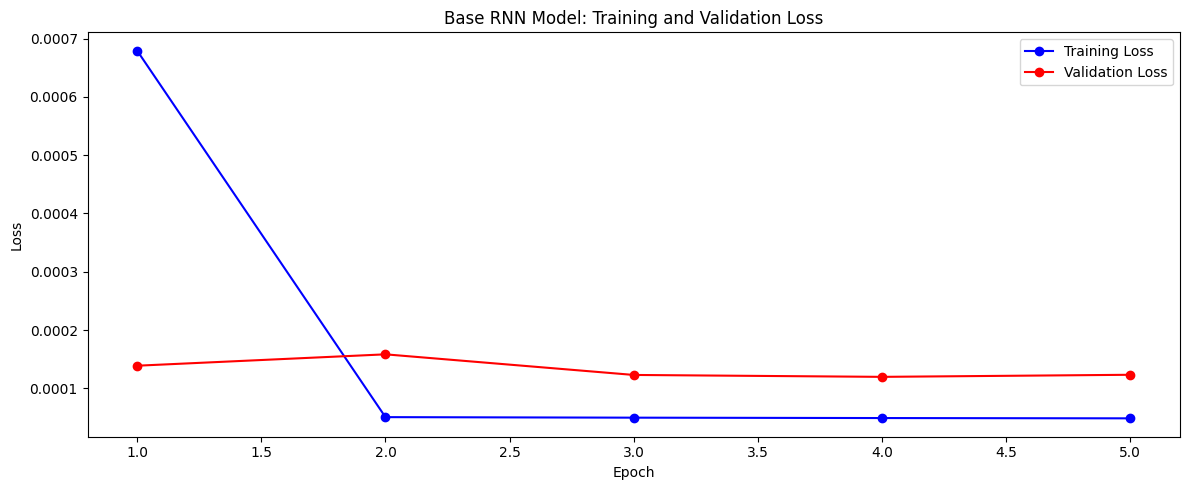

Evaluating Base RNN Model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


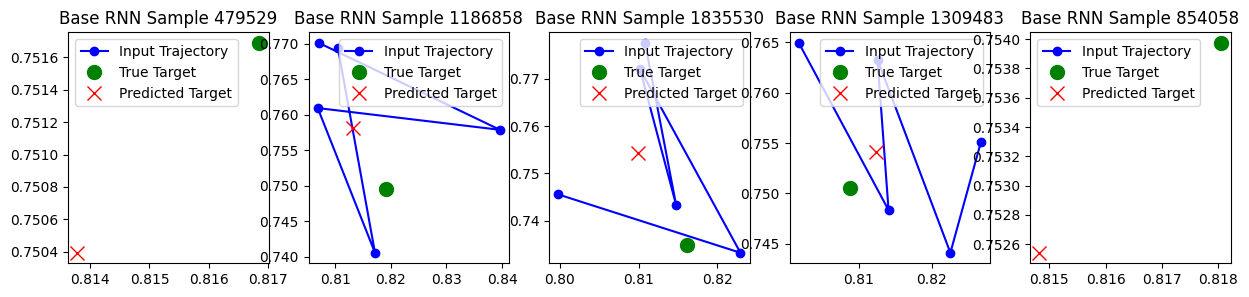

In [16]:
import os
import numpy as np
import requests
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

############################################
# Part 1: Download and Extract the Dataset
############################################
# Direct download URL for the Geolife Trajectories 1.3 dataset
url = "https://download.microsoft.com/download/f/4/8/f4894aa5-fdbc-481e-9285-d5f8c4c4f039/Geolife%20Trajectories%201.3.zip"
zip_path = "Geolife_Trajectories_1.3.zip"

print("Downloading Geolife dataset...")
r = requests.get(url, stream=True)
with open(zip_path, "wb") as f:
    for chunk in r.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)
print("Download completed.")

# Create extraction directory if it doesn't exist
extract_path = "Geolife_Trajectories"
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

print("Extracting dataset...")
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction completed.")

############################################
# Part 2: Data Preprocessing
############################################
def load_geolife_trajectories_recursive(root_path):

    trajectories = []
    file_count = 0
    # Use os.walk to recursively search for .plt files
    for dirpath, dirnames, filenames in os.walk(root_path):
        for file_name in filenames:
            if file_name.endswith('.plt'):
                file_count += 1
                file_path = os.path.join(dirpath, file_name)
                with open(file_path, 'r') as f:
                    lines = f.readlines()
                    # Skip the header lines (first 6 lines)
                    data_lines = lines[6:]
                    traj = []
                    for line in data_lines:
                        parts = line.strip().split(',')
                        if len(parts) < 2:
                            continue
                        try:
                            lat = float(parts[0])
                            lon = float(parts[1])
                            traj.append([lat, lon])
                        except ValueError:
                            continue
                    if len(traj) > 0:
                        trajectories.append(np.array(traj))
    print(f"Total .plt files processed: {file_count}")
    return trajectories

# Set the root directory for trajectory data. According to the folder structure, data is in:
# "Geolife_Trajectories/Geolife Trajectories 1.3/Data"
root_path = os.path.join("Geolife_Trajectories", "Geolife Trajectories 1.3", "Data")
trajectories = load_geolife_trajectories_recursive(root_path)
print("Total trajectories loaded:", len(trajectories))

# Print each trajectory's length for debugging
print("Trajectory lengths:")
for i, traj in enumerate(trajectories):
    print(f"Trajectory {i} length: {traj.shape[0]}")

# Data Cleaning: Filter out trajectories with less than 5 points.
cleaned_trajectories = [traj for traj in trajectories if traj.shape[0] >= 5]
if len(cleaned_trajectories) == 0:
    print("No trajectories passed the filtering criteria. Using all trajectories.")
    cleaned_trajectories = trajectories
print("Trajectories after cleaning:", len(cleaned_trajectories))

# To further reduce training time, select only a subset of trajectories (e.g., 3%).
subset_fraction = 0.03
num_subset = int(len(cleaned_trajectories) * subset_fraction)
num_subset = max(num_subset, 1)  # Ensure at least 1 trajectory is selected.
cleaned_trajectories = cleaned_trajectories[:num_subset]
print("Using subset of trajectories:", len(cleaned_trajectories))

# Concatenate all trajectory points to compute the global minimum and maximum for normalization.
try:
    all_points = np.concatenate(cleaned_trajectories, axis=0)
except ValueError as e:
    print("Error concatenating trajectories:", e)
    all_points = np.array([])

if all_points.size == 0:
    raise ValueError("No data available for normalization. Check data loading/cleaning steps.")

min_vals = all_points.min(axis=0)  # [min_lat, min_lon]
max_vals = all_points.max(axis=0)  # [max_lat, max_lon]
print("Global min values (lat, lon):", min_vals)
print("Global max values (lat, lon):", max_vals)

def normalize_trajectory(traj, min_vals, max_vals):
    """
    Normalize trajectory coordinates to the range [0, 1] using min-max scaling.
    """
    return (traj - min_vals) / (max_vals - min_vals)

# Normalize each trajectory.
normalized_trajectories = [normalize_trajectory(traj, min_vals, max_vals) for traj in cleaned_trajectories]

# Data Augmentation (Optional): Add Gaussian noise to each normalized trajectory.
def augment_trajectory(traj, noise_std=0.01):
    noise = np.random.randn(*traj.shape) * noise_std
    return traj + noise

augmented_trajectories = normalized_trajectories + [augment_trajectory(traj) for traj in normalized_trajectories]
print("Total trajectories after augmentation:", len(augmented_trajectories))

# Sample Construction: Generate training samples using a sliding window.
# To further speed up training, the input sequence length is set to 5.
def create_samples_from_trajectory(traj, input_length=5):
    """
    Generate training samples from a single trajectory.
    Each sample consists of an input sequence of length 'input_length' and the next time step as the target.
    """
    X, Y = [], []
    for i in range(len(traj) - input_length):
        X.append(traj[i:i+input_length])
        Y.append(traj[i+input_length])
    return X, Y

X_samples = []
Y_samples = []
for traj in augmented_trajectories:
    x, y = create_samples_from_trajectory(traj, input_length=5)
    X_samples.extend(x)
    Y_samples.extend(y)

X_samples = np.array(X_samples)  # Final input shape: (num_samples, 5, 2)
Y_samples = np.array(Y_samples)  # Final target shape: (num_samples, 2)
print("Final X_samples shape:", X_samples.shape)
print("Final Y_samples shape:", Y_samples.shape)

############################################
# Part 3: RNN Model Architecture and Training
############################################
def build_rnn_model():
    """
    Build a simple LSTM model for trajectory prediction.
    Input: Sequence of 5 time steps, each with 2 features (x, y).
    Output: Predicted coordinate (x, y) for the next time step.
    """
    model = models.Sequential([
        layers.LSTM(32, input_shape=(5, 2)),  # Using 32 hidden units for a simpler model.
        layers.Dense(2)
    ])
    return model

model_rnn = build_rnn_model()
model_rnn.summary()

model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='mse')

# Train the model for 5 epochs with a batch size of 64.
epochs = 5
history_rnn = model_rnn.fit(X_samples, Y_samples, epochs=epochs, validation_split=0.2, batch_size=64)

############################################
# Part 4: Visualization and Evaluation
############################################
def plot_training_history(history, title_prefix=""):
    """
    Plot the training and validation loss curves.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(epochs_range, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{title_prefix} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history_rnn, "Base RNN Model:")

def evaluate_and_visualize(model, X_test, Y_test, title_prefix=""):
    """
    Evaluate the model on test samples and visualize the input trajectory,
    the true target, and the predicted target.
    """
    num_samples_vis = 5
    indices = np.random.choice(len(X_test), num_samples_vis, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        ax = plt.subplot(1, num_samples_vis, i+1)
        input_seq = X_test[idx]
        true_target = Y_test[idx]
        pred_target = model.predict(X_test[idx:idx+1])[0]

        # Plot input trajectory using blue markers and lines
        plt.plot(input_seq[:, 0], input_seq[:, 1], 'bo-', label='Input Trajectory')
        # Plot true target using a green circle
        plt.plot(true_target[0], true_target[1], 'go', markersize=10, label='True Target')
        # Plot predicted target using a red cross
        plt.plot(pred_target[0], pred_target[1], 'rx', markersize=10, label='Predicted Target')
        plt.title(f"{title_prefix} Sample {idx}")
        plt.legend()
    plt.show()

print("Evaluating Base RNN Model:")
evaluate_and_visualize(model_rnn, X_samples, Y_samples, title_prefix="Base RNN")


In [10]:
pip install tensorflow

In [13]:
###########################################
# Part 3: RNN Model Architecture and Training
###########################################
def build_rnn_model():
    """
    Build a simplified LSTM model for trajectory prediction.
    Input: 5 time steps, each with 2 features (x and y coordinates).
    Output: Predicted coordinate (x, y) for the next time step.
    """
    model = models.Sequential([
        # LSTM layer with 32 hidden units; the input shape is (5, 2)
        layers.LSTM(32, input_shape=(5, 2)),
        # Dense output layer with 2 neurons to predict the next (x, y) coordinate
        layers.Dense(2)
    ])
    return model

# Create the model and print its summary
model_rnn = build_rnn_model()
model_rnn.summary()

# Compile the model using the Adam optimizer and mean squared error (MSE) loss.
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='mse')

# Set training parameters: 5 epochs and a batch size of 64 to speed up training.
epochs = 5
history_rnn = model_rnn.fit(X_samples, Y_samples, epochs=epochs, validation_split=0.2, batch_size=64)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,546 (17.76 KB)

 Trainable params: 4,546 (17.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 115s 5ms/step - loss: 0.0057 - val_loss: 1.4652e-04
Epoch 2/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - loss: 5.1292e-05 - val_loss: 1.6137e-04
Epoch 3/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 149s 5ms/step - loss: 5.0248e-05 - val_loss: 1.4509e-04
Epoch 4/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 4.9594e-05 - val_loss: 1.3251e-04
Epoch 5/5
23329/23329 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - loss: 4.9000e-05 - val_loss: 1.1930e-04


## Part 4: Training History Visualization and Evaluation
This part of the code is responsible for visualizing the training process and evaluating the model on a few test samples.

plot_training_history(history, title_prefix=""):

Purpose:
This function plots the training and validation loss curves over epochs.

Functionality:

It extracts the training loss (history.history['loss']) and validation loss (history.history['val_loss']) from the training history object.

It then plots both curves (blue markers for training loss and red markers for validation loss) against the epoch numbers.

The plot is labeled appropriately with a title (which can include a prefix), as well as axis labels.

Finally, the plot layout is adjusted and displayed.

evaluate_and_visualize(model, X_test, Y_test, title_prefix=""):

Purpose:
This function evaluates the trained model on a random selection of test samples and visualizes the input sequence, the true target, and the model's predicted target.

Functionality:

It randomly selects 5 test samples from the test dataset.

For each sample, it plots the input trajectory (displayed using blue markers and lines), the true target coordinate (green circle), and the predicted coordinate (red cross).

Each subplot is titled with a sample index and an optional title prefix for clarity.

The final plot is displayed for visual evaluation of the model's performance.

The code then calls these functions to visualize the training history and to evaluate the base RNN model using the training samples.

## Part 5: Model Improvements
This section presents two model improvement strategies to enhance the model's performance. It includes two different modifications:

Improvement 1: Deeper RNN Model

Function build_rnn_model_deep():

Purpose:
To build a deeper LSTM model by stacking two LSTM layers.

Functionality:

The first LSTM layer returns sequences (return_sequences=True), allowing its output to be used as input to a second LSTM layer.

The second LSTM layer processes these sequences and returns the output of the final time step.

Finally, a Dense layer with 2 neurons is used to produce the predicted (x, y) coordinate.

The model is then compiled (using the Adam optimizer with MSE loss) and trained for the specified epochs.

After training, the training history is visualized, and the model's predictions are evaluated using the evaluate_and_visualize function.

Improvement 2: RNN Model with Dropout

Function build_rnn_model_dropout():

Purpose:
To build an RNN model that incorporates Dropout layers, which help mitigate overfitting.

Functionality:

Similar to the deeper model, two LSTM layers are used.

Dropout layers with a dropout rate of 50% are added after each LSTM layer.

The final Dense layer outputs the predicted (x, y) coordinate.

This model is also compiled and trained, followed by visualization of training history and evaluation using the evaluate_and_visualize function.



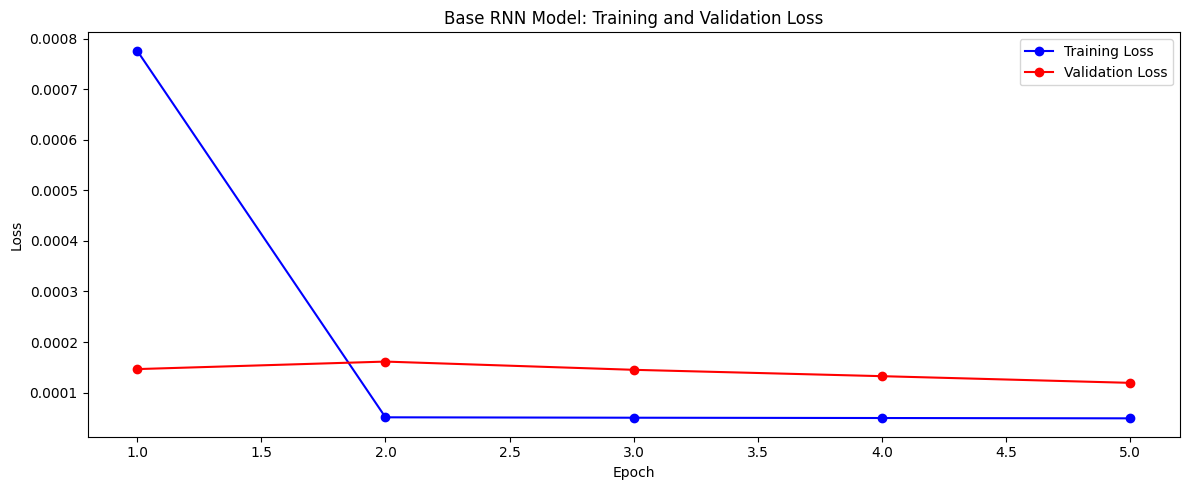

Evaluating Base RNN Model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


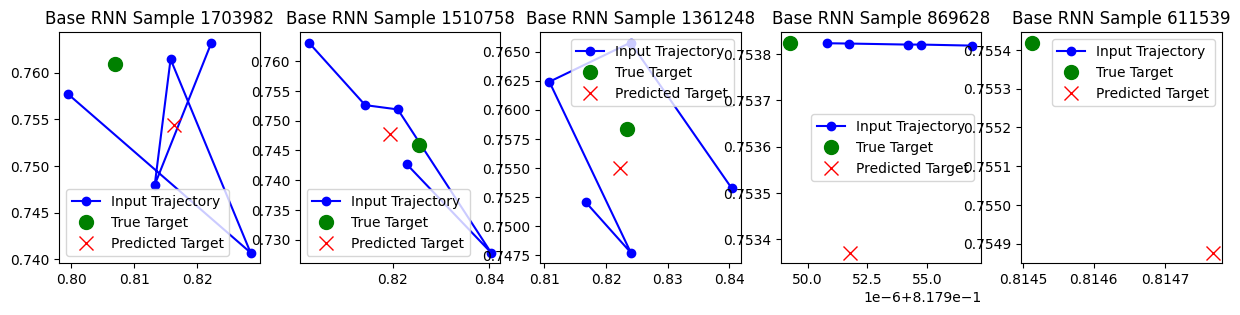

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 10, 64)              │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,306 (196.51 KB)

 Trainable params: 50,306 (196.51 KB)

 Non-trainable params: 0 (0.00 B)

Training Deeper RNN Model...
Epoch 1/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 303s 6ms/step - loss: 9.3332e-04 - val_loss: 1.5761e-04
Epoch 2/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 292s 6ms/step - loss: 5.5632e-05 - val_loss: 1.2555e-04
Epoch 3/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 300s 6ms/step - loss: 5.1762e-05 - val_loss: 1.2098e-04
Epoch 4/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 300s 6ms/step - loss: 4.9829e-05 - val_loss: 1.1012e-04
Epoch 5/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 322s 6ms/step - loss: 4.6869e-05 - val_loss: 1.1020e-04


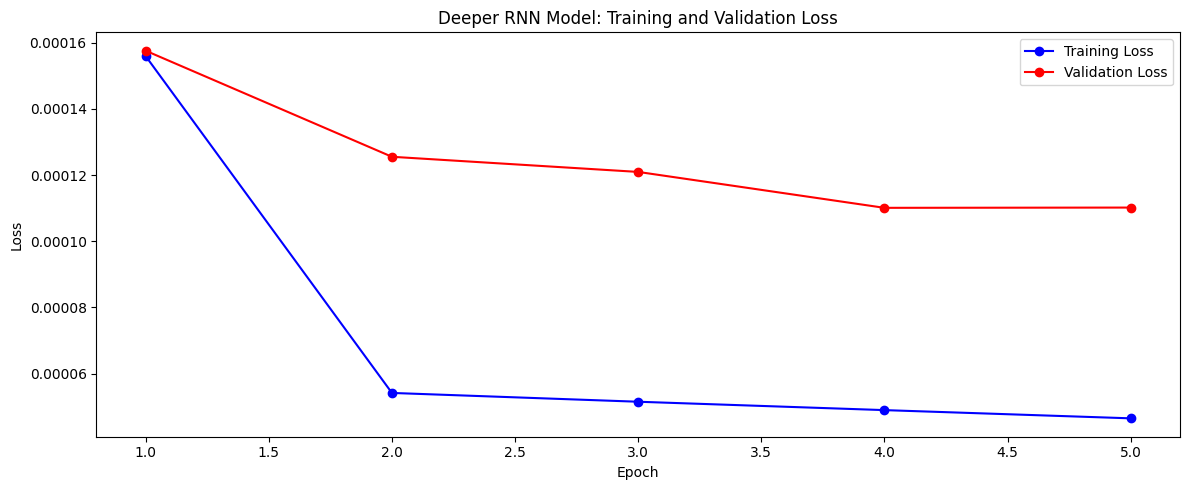

Evaluating Deeper RNN Model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


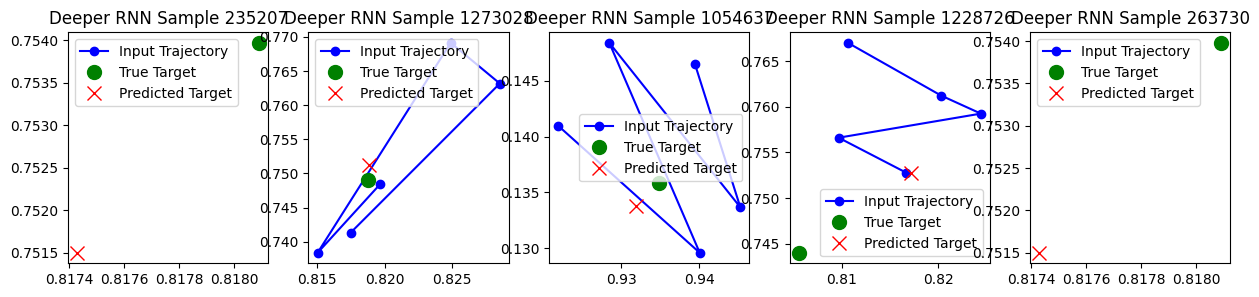

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 10, 64)              │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,306 (196.51 KB)

 Trainable params: 50,306 (196.51 KB)

 Non-trainable params: 0 (0.00 B)

Training RNN Model with Dropout...
Epoch 1/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 337s 7ms/step - loss: 0.0031 - val_loss: 1.4069e-04
Epoch 2/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 329s 7ms/step - loss: 2.2280e-04 - val_loss: 1.2697e-04
Epoch 3/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 389s 7ms/step - loss: 2.1526e-04 - val_loss: 1.3199e-04
Epoch 4/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 370s 7ms/step - loss: 2.1096e-04 - val_loss: 1.3236e-04
Epoch 5/5
46657/46657 ━━━━━━━━━━━━━━━━━━━━ 390s 7ms/step - loss: 2.0961e-04 - val_loss: 1.2604e-04


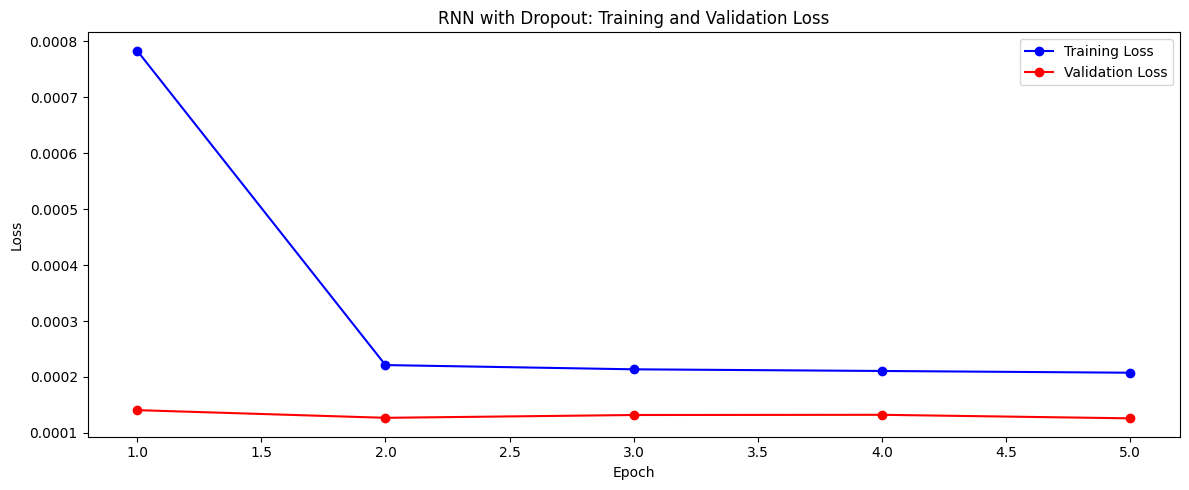

Evaluating RNN Model with Dropout:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


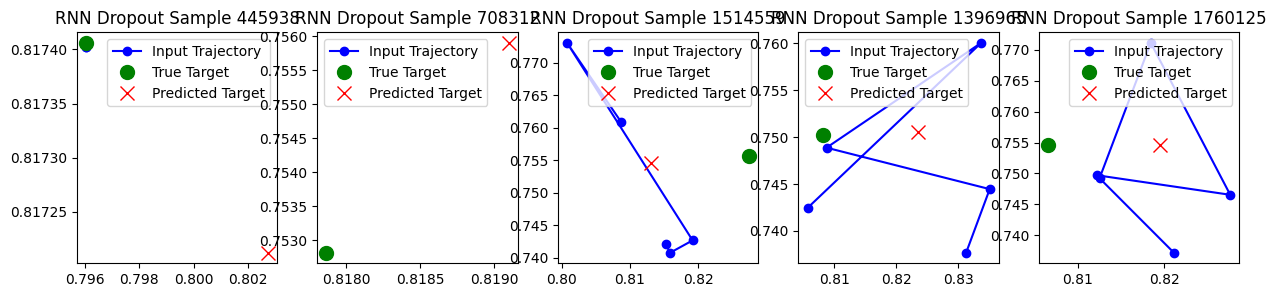

In [14]:
###########################################
# Part 4: Training History Visualization and Evaluation
############################################
import matplotlib.pyplot as plt

def plot_training_history(history, title_prefix=""):
    """
    Plot training and validation loss curves.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(epochs_range, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{title_prefix} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history_rnn, "Base RNN Model:")

def evaluate_and_visualize(model, X_test, Y_test, title_prefix=""):
    """
    Evaluate the model on test samples and visualize the input trajectory,
    the true target, and the predicted target.
    """
    num_samples_vis = 5
    indices = np.random.choice(len(X_test), num_samples_vis, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        ax = plt.subplot(1, num_samples_vis, i+1)
        input_seq = X_test[idx]
        true_target = Y_test[idx]
        pred_target = model.predict(X_test[idx:idx+1])[0]

        plt.plot(input_seq[:, 0], input_seq[:, 1], 'bo-', label='Input Trajectory')
        plt.plot(true_target[0], true_target[1], 'go', markersize=10, label='True Target')
        plt.plot(pred_target[0], pred_target[1], 'rx', markersize=10, label='Predicted Target')
        plt.title(f"{title_prefix} Sample {idx}")
        plt.legend()
    plt.show()

print("Evaluating Base RNN Model:")
evaluate_and_visualize(model_rnn, X_samples, Y_samples, title_prefix="Base RNN")

############################################
# Part 5: Model Improvements
############################################

# Improvement 1: Build a deeper RNN model by increasing the number of LSTM layers.
def build_rnn_model_deep():
    """
    Build a deeper LSTM model by stacking LSTM layers.
    The first LSTM layer returns sequences for the next LSTM layer.
    """
    model = models.Sequential([
        layers.LSTM(64, return_sequences=True, input_shape=(10, 2)),
        layers.LSTM(64),
        layers.Dense(2)
    ])
    return model

model_rnn_deep = build_rnn_model_deep()
model_rnn_deep.summary()

model_rnn_deep.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                       loss='mse')
print("Training Deeper RNN Model...")
history_rnn_deep = model_rnn_deep.fit(X_samples, Y_samples, epochs=epochs, validation_split=0.2)
plot_training_history(history_rnn_deep, "Deeper RNN Model:")

print("Evaluating Deeper RNN Model:")
evaluate_and_visualize(model_rnn_deep, X_samples, Y_samples, title_prefix="Deeper RNN")

# Improvement 2: Build an RNN model with Dropout to reduce overfitting.
def build_rnn_model_dropout():
    """
    Build an RNN model with Dropout layers to mitigate overfitting.
    """
    model = models.Sequential([
        layers.LSTM(64, return_sequences=True, input_shape=(10, 2)),
        layers.Dropout(0.5),
        layers.LSTM(64),
        layers.Dropout(0.5),
        layers.Dense(2)
    ])
    return model

model_rnn_dropout = build_rnn_model_dropout()
model_rnn_dropout.summary()

model_rnn_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                          loss='mse')
print("Training RNN Model with Dropout...")
history_rnn_dropout = model_rnn_dropout.fit(X_samples, Y_samples, epochs=epochs, validation_split=0.2)
plot_training_history(history_rnn_dropout, "RNN with Dropout:")

print("Evaluating RNN Model with Dropout:")
evaluate_and_visualize(model_rnn_dropout, X_samples, Y_samples, title_prefix="RNN Dropout")